# 鸢尾花分类问题
我们的目标是构建一个机器学习模型，可以从这些已知品种的鸢尾花测量数据中进行学

# 初识数据
## 怎么理解标签
单个数据点（一朵鸢尾花）的预期输出是这朵花的品种。对于一个数据点来说，它的品种叫作标签（label）。\
\
标签 = 正确答案 \
在本题中，指花的各种特征正确预测出来的品种\



## 什么是 Iris 数据集？
Iris 数据集是机器学习中最经典的入门数据集之一，由英国统计学家 Ronald Fisher 在 1936 年提出。它包含 150 个样本，每个样本有 4 个特征（花萼长度、花萼宽度、花瓣长度、花瓣宽度），对应 3 种鸢尾花类别：

Setosa（山鸢尾）

Versicolor（杂色鸢尾）

Virginica（维吉尼亚鸢尾）

我们的目标是：根据这 4 个测量值，预测一朵花属于哪一类。



## 必要的库

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn

本例中我们用到了鸢尾花（Iris）数据集，这是机器学习和统计学中一个经典的数据集。\
它包含在scikit-learn 的datasets 模块中。我们可以调用load_iris函数来加载数据

In [15]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])



DESCR 键对应的值是数据集的简要说明。

In [16]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


*target_names 键对应的值是一个字符串数组，里面包含我们要预测的花的品种*：

In [17]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


*feature_names 键对应的值是一个字符串列表，对每一个特征进行了说明*：

In [18]:
 print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


花萼长度、花萼宽度、花瓣长度、花瓣宽度.
格式为NumPy数组：

In [19]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


data 数组的每一行对应一朵花，列代表每朵花的四个测量数据.150行，4列

In [20]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


机器学习中的个体叫作样本（sample），其属性叫作特征（feature）。\
data数组的形状（shape）是样本数乘以特征数。这是scikit-learn 中的约定\
前5个样本的特征数值：

In [21]:
print("{}".format(iris_dataset['data'][:5]))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


从数据中可以看出，前5朵花的花瓣宽度都是0.2cm，第一朵花的花萼最长，是5.1cm。

target 数组包含的是测量过的每朵花的品种，也是一个NumPy数组：

In [22]:
print("Type of target :{}".format(type(iris_dataset['target'])))

Type of target :<class 'numpy.ndarray'>


In [24]:
print("Shape of target: {}".format(iris_dataset['target'].shape))


Shape of target: (150,)


In [25]:
print("Target:\n{}".format(iris_dataset['target']))
# 品种被转换成从0到2的整数：

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


上述数字的代表含义由iris['target_names']数组给出：0代表setosa，1代表versicolor，
2 代表virginica。

# 训练数据与测试数据

scikit-learn 中的 train_test_split 函数可以打乱数据集并进行拆分。\
这个函数将75%的行数据及对应标签作为训练集，剩下25%的数据及其标签作为测试集。\
训练集与测试集的分配比例可以是随意的，但使用25%的数据作为测试集是很好的经验法则。\
\
scikit-learn 中的数据通常用大写的X表示，而标签用小写的y表示。 

## 对数据调用train_test_split
并对输出结果采用下面这种命名方法：

In [29]:
from sklearn.model_selection import train_test_split 

# X是特征，y是标签
X = iris['data']
y = iris['target']

# 划分：80% 训练，20% 测试
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% 作为测试集
    random_state=42     # 固定随机种子，保证每次结果一样
)

print("训练集大小:", X_train.shape)  # 应该是 (120, 4)
print("测试集大小:", X_test.shape)   # 应该是 (30, 4)

训练集大小: (120, 4)
测试集大小: (30, 4)


在对数据进行拆分之前，train_test_split函数利用伪随机数生成器将数据集打乱。\
如果我们只是将最后25%的数据作为测试集，那么所有数据点的标签都是2\
因为数据点是按标签排序的（参见之前iris['target']的输出）\
\
为了确保多次运行同一函数能够得到相同的输出，我们利用random_state参数指定了随机数生成器的种子。\
这样函数输出就是固定不变的，所以这行代码的输出始终相同。

## 数据分割（train_test_split）
X_train 是“特征”矩阵，有 112 行 × 4 列 → 每行是一个样本，每列是一个特征（如花萼长度、花瓣宽度等）\
y_train 是“标签”向量，有 112 个值 → 每个值对应一个样本的类别（如 0, 1, 2）(前面说过一共有三个品种）

train_test_split 函数的输出为X_train、X_test、y_train 和 y_test，它们都是NumPy数组。\
X_train包含75%的行数据，X_test包含剩下的25%：

In [30]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}\n".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (120, 4)
y_train shape: (120,)

X_test shape: (30, 4)
y_test shape: (30,)


# 可视化
一种可视化方法是绘制散点图（scatter plot）。\
数据散点图将一个特征作为x轴，另一个特征作为y轴，将每一个数据点绘制为图上的一个点。\
不幸的是，计算机屏幕只有两个维度，所以我们一次只能绘制两个特征（也可能是
3 个）。用这种方法难以对多于3个特征的数据集作图。解决这个问题的一种方法是绘制散
点图矩阵（pair plot），从而可以两两查看所有的特征。\
\
数据点的颜色与鸢尾花的品种相对应。为了绘制这
张图，我们首先将NumPy数组转换成pandas DataFrame。pandas有一个绘制散点图矩阵的
函数，叫作scatter_matrix。矩阵的对角线是每个特征的直方图：

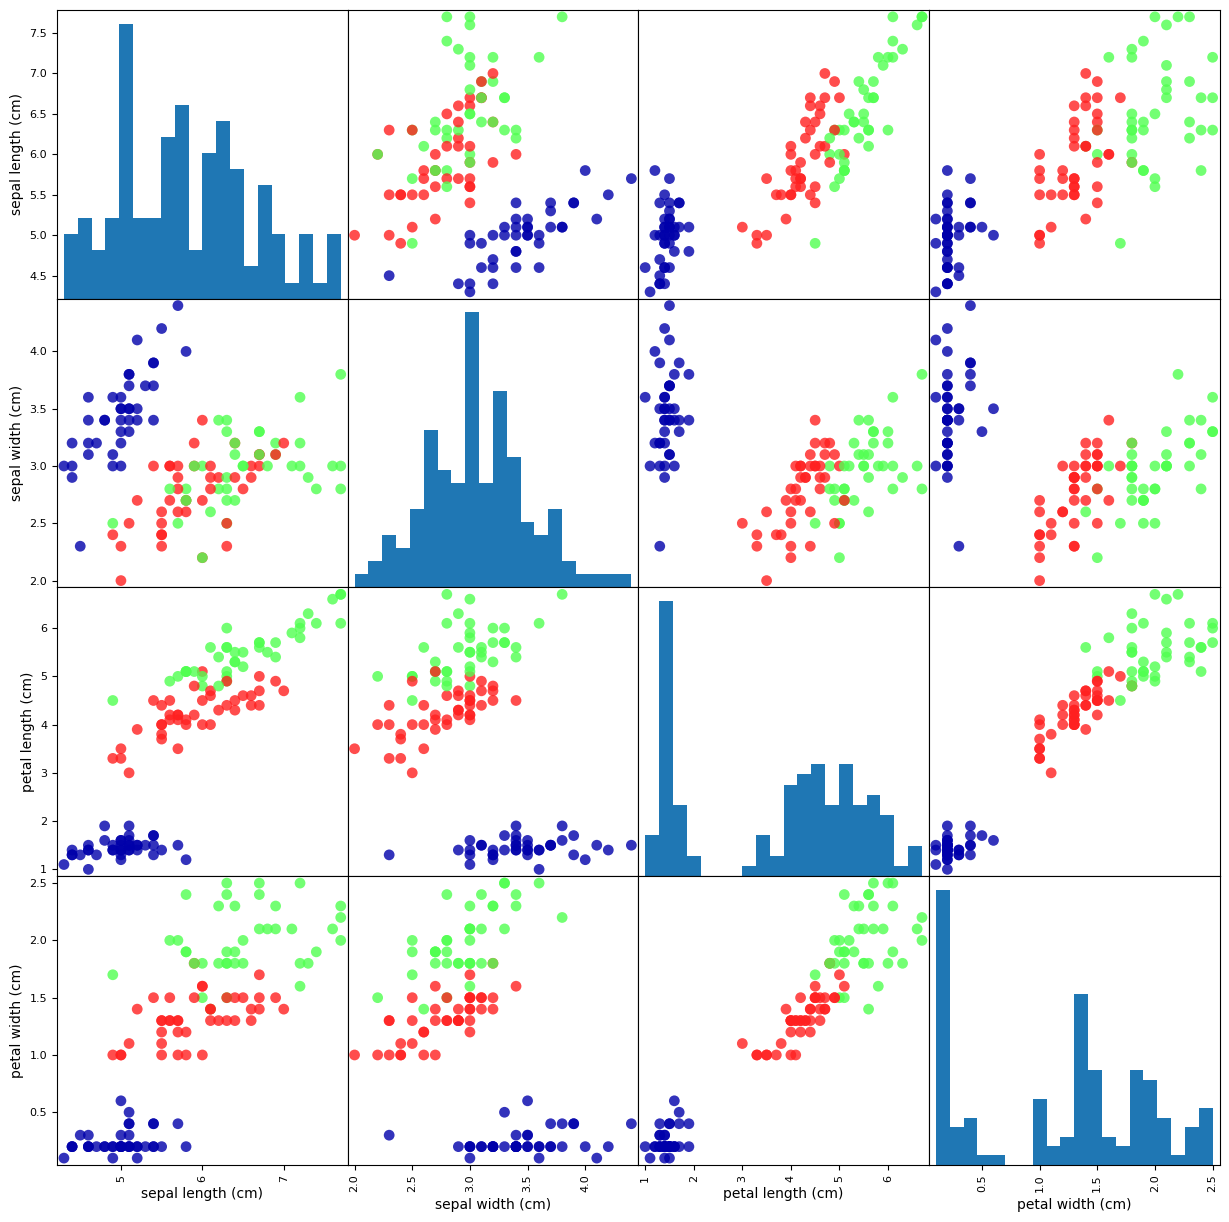

In [31]:
#利用X_train中的数据创建DataFrame 
from pandas.plotting import scatter_matrix

# 利用iris_dataset.feature_names中的字符串对数据列进行标记 
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names) 
# 利用DataFrame创建散点图矩阵，按y_train着色 
grr = scatter_matrix(iris_dataframe, 
                     c=y_train, 
                     figsize=(15, 15), 
                     marker='o', 
                     hist_kwds={'bins': 20}, 
                     s=60, 
                     alpha=0.8, 
                     cmap=mglearn.cm3)

# 构建第一个模型：k近邻算法
k 近邻算法中k的含义是，我们可以考虑训练集中与新数据点最近的任意k个邻居（比如
说，距离最近的3个或5个邻居），而不是只考虑最近的那一个。然后，我们可以用这些
邻居中数量最多的类别做出预测。\
\
scikit-learn 中所有的机器学习模型都在各自的类中实现，这些类被称为Estimator
类。k近邻分类算法是在neighbors模块的KNeighborsClassifier 类中实现的。我们需
要将这个类实例化为一个对象，然后才能使用这个模型。这时我们需要设置模型的参数。
KNeighborsClassifier 最重要的参数就是邻居的数目，这里我们设为1：

In [37]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

 knn 对象对算法进行了封装，既包括用训练数据构建模型的算法，也包括对新数据点进行
预测的算法。它还包括算法从训练数据中提取的信息。对于KNeighborsClassifier来说，
里面只保存了训练集。\
\
想要基于训练集来构建模型，需要调用knn对象的fit方法，输入参数为X_train和y_
 train，二者都是NumPy数组，前者包含训练数据，后者包含相应的训练标签：

In [38]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2, 
weights='uniform')

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,1


# 做出预测
想象一下，我们在野外发现了一朵鸢尾花，花萼长5cm宽2.9cm，花瓣长1cm宽
0.2cm。这朵鸢尾花属于哪个品种？我们可以将这些数据放在一个NumPy数组中，再次计
算形状，数组形状为样本数（1）乘以特征数（4）

In [39]:
X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


注意，我们将这朵花的测量数据转换为二维NumPy数组的一行，这是因为scikit-learn
的输入数据必须是二维数组。
我们调用knn对象的predict方法来进行预测：

In [40]:
# 对测试集做预测
y_pred = knn.predict(X_test)

# 打印预测结果（前10个）
print("预测结果:", y_pred[:10])
print("真实标签:", y_test[:10])

预测结果: [1 0 2 1 1 0 1 2 1 1]
真实标签: [1 0 2 1 1 0 1 2 1 1]


# 评估模型
这里需要用到之前创建的测试集。这些数据没有用于构建模型，但我们知道测试集中每朵
鸢尾花的实际品种。\
\
因此，我们可以对测试数据中的每朵鸢尾花进行预测，并将预测结果与标签（已知的品
种）进行对比。\
我们可以通过计算精度（accuracy）来衡量模型的优劣，精度就是品种预
测正确的花所占的比例：

In [41]:
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [46]:
from sklearn.metrics import accuracy_score

# 计算准确率：预测正确的比例
acc = accuracy_score(y_test, y_pred)
print(f"模型准确率: {acc:.2%}")

模型准确率: 100.00%


# 预测一个新样本（你自己输入！）
假设你测量了一朵新鸢尾花：

花萼长 5.1 cm
花萼宽 3.5 cm
花瓣长 1.4 cm
花瓣宽 0.2 cm
你想知道它是什么品种？

In [50]:
# 注意：输入必须是二维数组（即使只有一个样本）
new_sample = [[5.1, 3.5, 1.4, 0.2]]

prediction = knn.predict(new_sample)
predicted_class = iris['target_names'][prediction[0]]

print("预测类别：", predicted_class)

预测类别： setosa


# 为什么这么简单就能成功？

Iris 数据集的三类花在特征空间中分得很开，尤其是 Setosa 和其他两类几乎不重叠。

KNN 是一种“懒惰学习”（lazy learning）算法，适合小数据、特征清晰的问题。

实际项目中，数据往往更复杂，需要数据清洗、特征工程、调参等步骤。